In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://app.roboflow.com/marblerace/skin-diseases-ewn74/1/

In [2]:
!pip install --upgrade ultralytics

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LMyOwJLlrX6UiuK3oxUW")
project = rf.workspace("marblerace").project("skin-diseases-ewn74")
version = project.version(2)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...


In [4]:
!nvidia-smi

Sun Mar 30 02:50:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# !cat /kaggle/working/Yolov8-skin-disease-detection-1/data.yaml

In [6]:
# %%writefile /kaggle/working/Yolov8-skin-disease-detection-1/data.yaml
# train: /kaggle/working/Yolov8-skin-disease-detection-1/train
# val: /kaggle/working/Yolov8-skin-disease-detection-1/valid
# test: /kaggle/working/Yolov8-skin-disease-detection-1/test

# nc: 9
# names: ['acne', 'eczema', 'herpes zoster', 'hives', 'lupus', 'object', 'raynauds', 'tinea', 'vitiligo']

# roboflow:
#   workspace: musa-yilmaz-cuawb
#   project: yolov8-skin-disease-detection
#   version: 1
#   license: CC BY 4.0
#   url: https://universe.roboflow.com/musa-yilmaz-cuawb/yolov8-skin-disease-detection/dataset/1

In [7]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.2/8062.4 GB disk)


In [8]:
from ultralytics import YOLO
from IPython.display import Image

In [9]:
# from ultralytics import YOLO

# #loading classification model
# model = YOLO('yolo11l-cls.pt')

# #train the model
# results = model.train(data='/kaggle/working/skin-diseases-2', epochs=10000, imgsz=640, patience=50, workers=10, batch=32, device=[0,1])

In [26]:
!yolo task=classify mode=train data='/kaggle/working/skin-diseases-2' model='yolo11l-cls.pt' epochs=10000 imgsz=640 patience=20 workers=10 batch=32 device=[0,1]

Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11l-cls.pt, data=/kaggle/working/skin-diseases-2, epochs=10000, time=None, patience=20, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=10, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

In [28]:
from IPython.display import Image

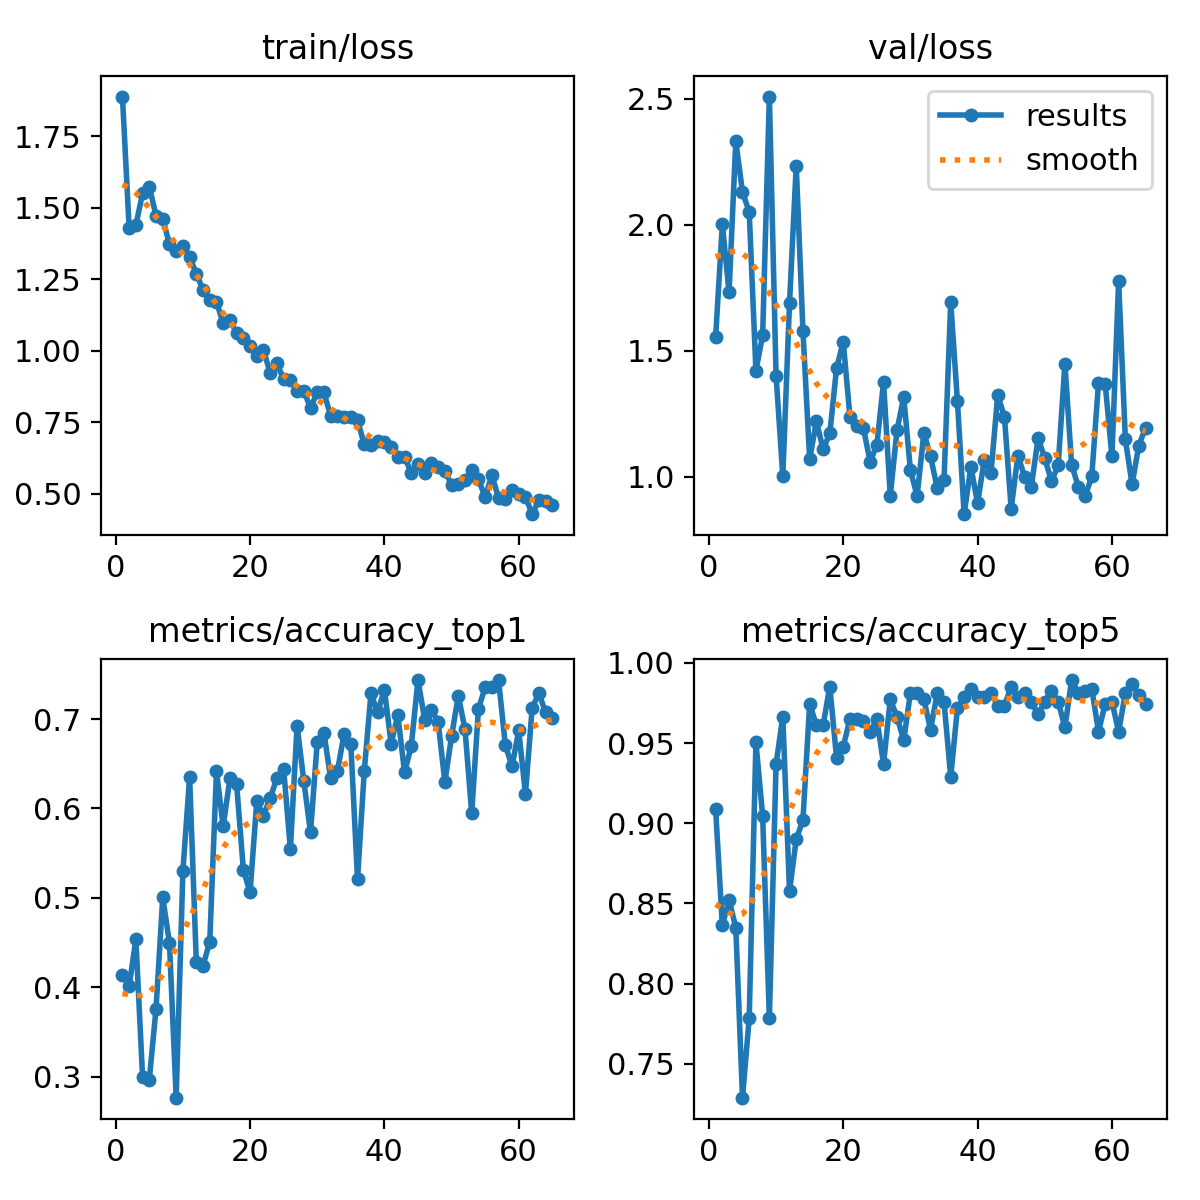

In [30]:

Image("/kaggle/working/runs/classify/train8/results.png", width=1000)

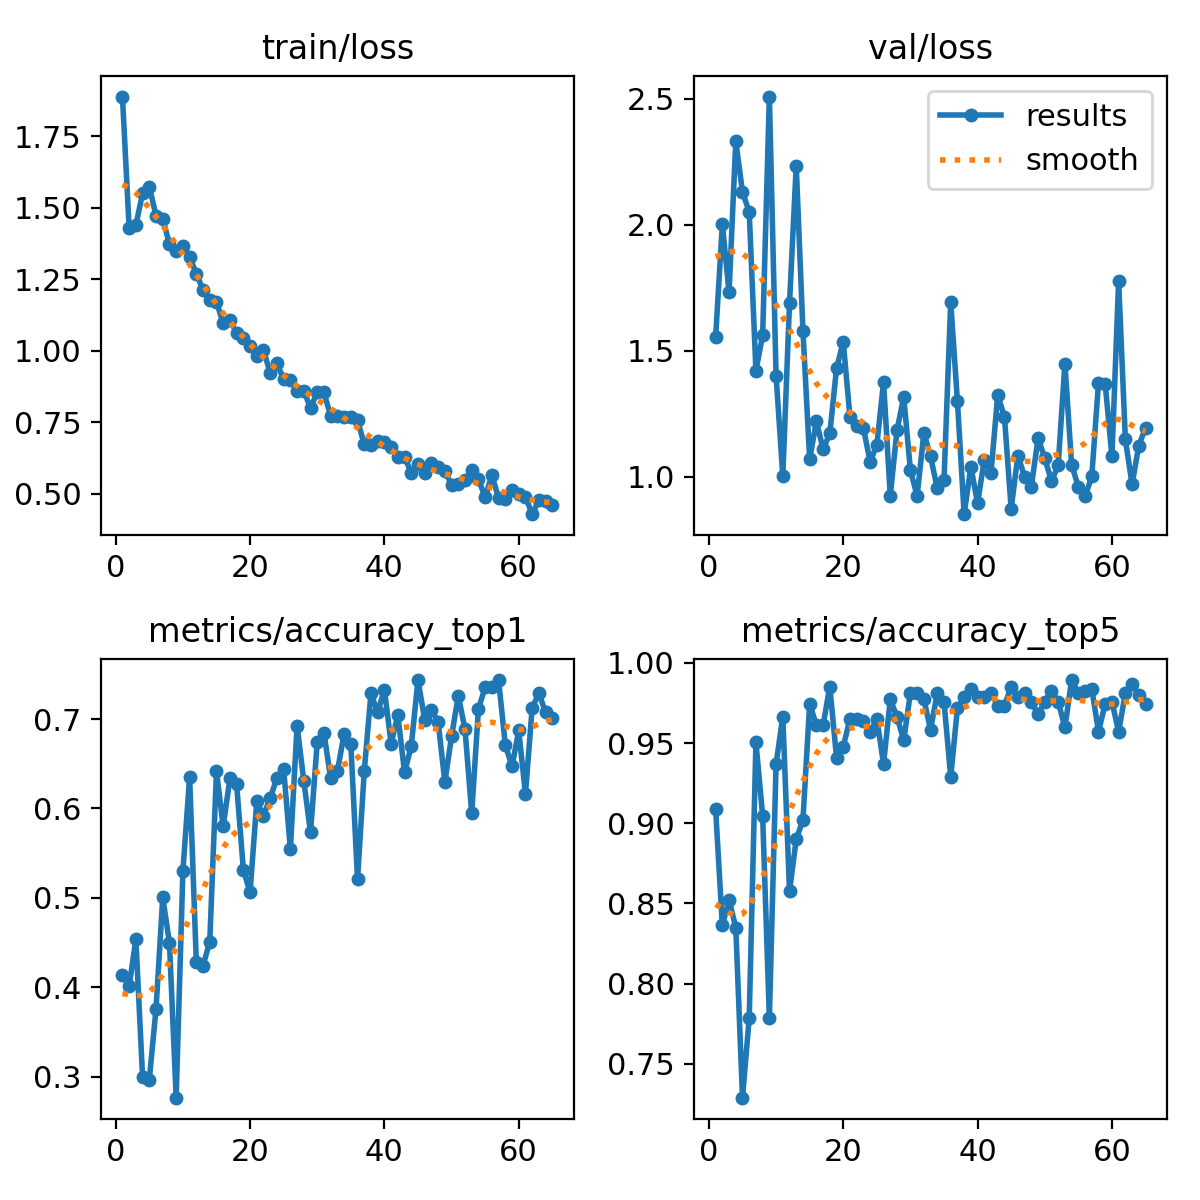

In [32]:

Image("/kaggle/working/runs/classify/train8/results.png", width=1500)

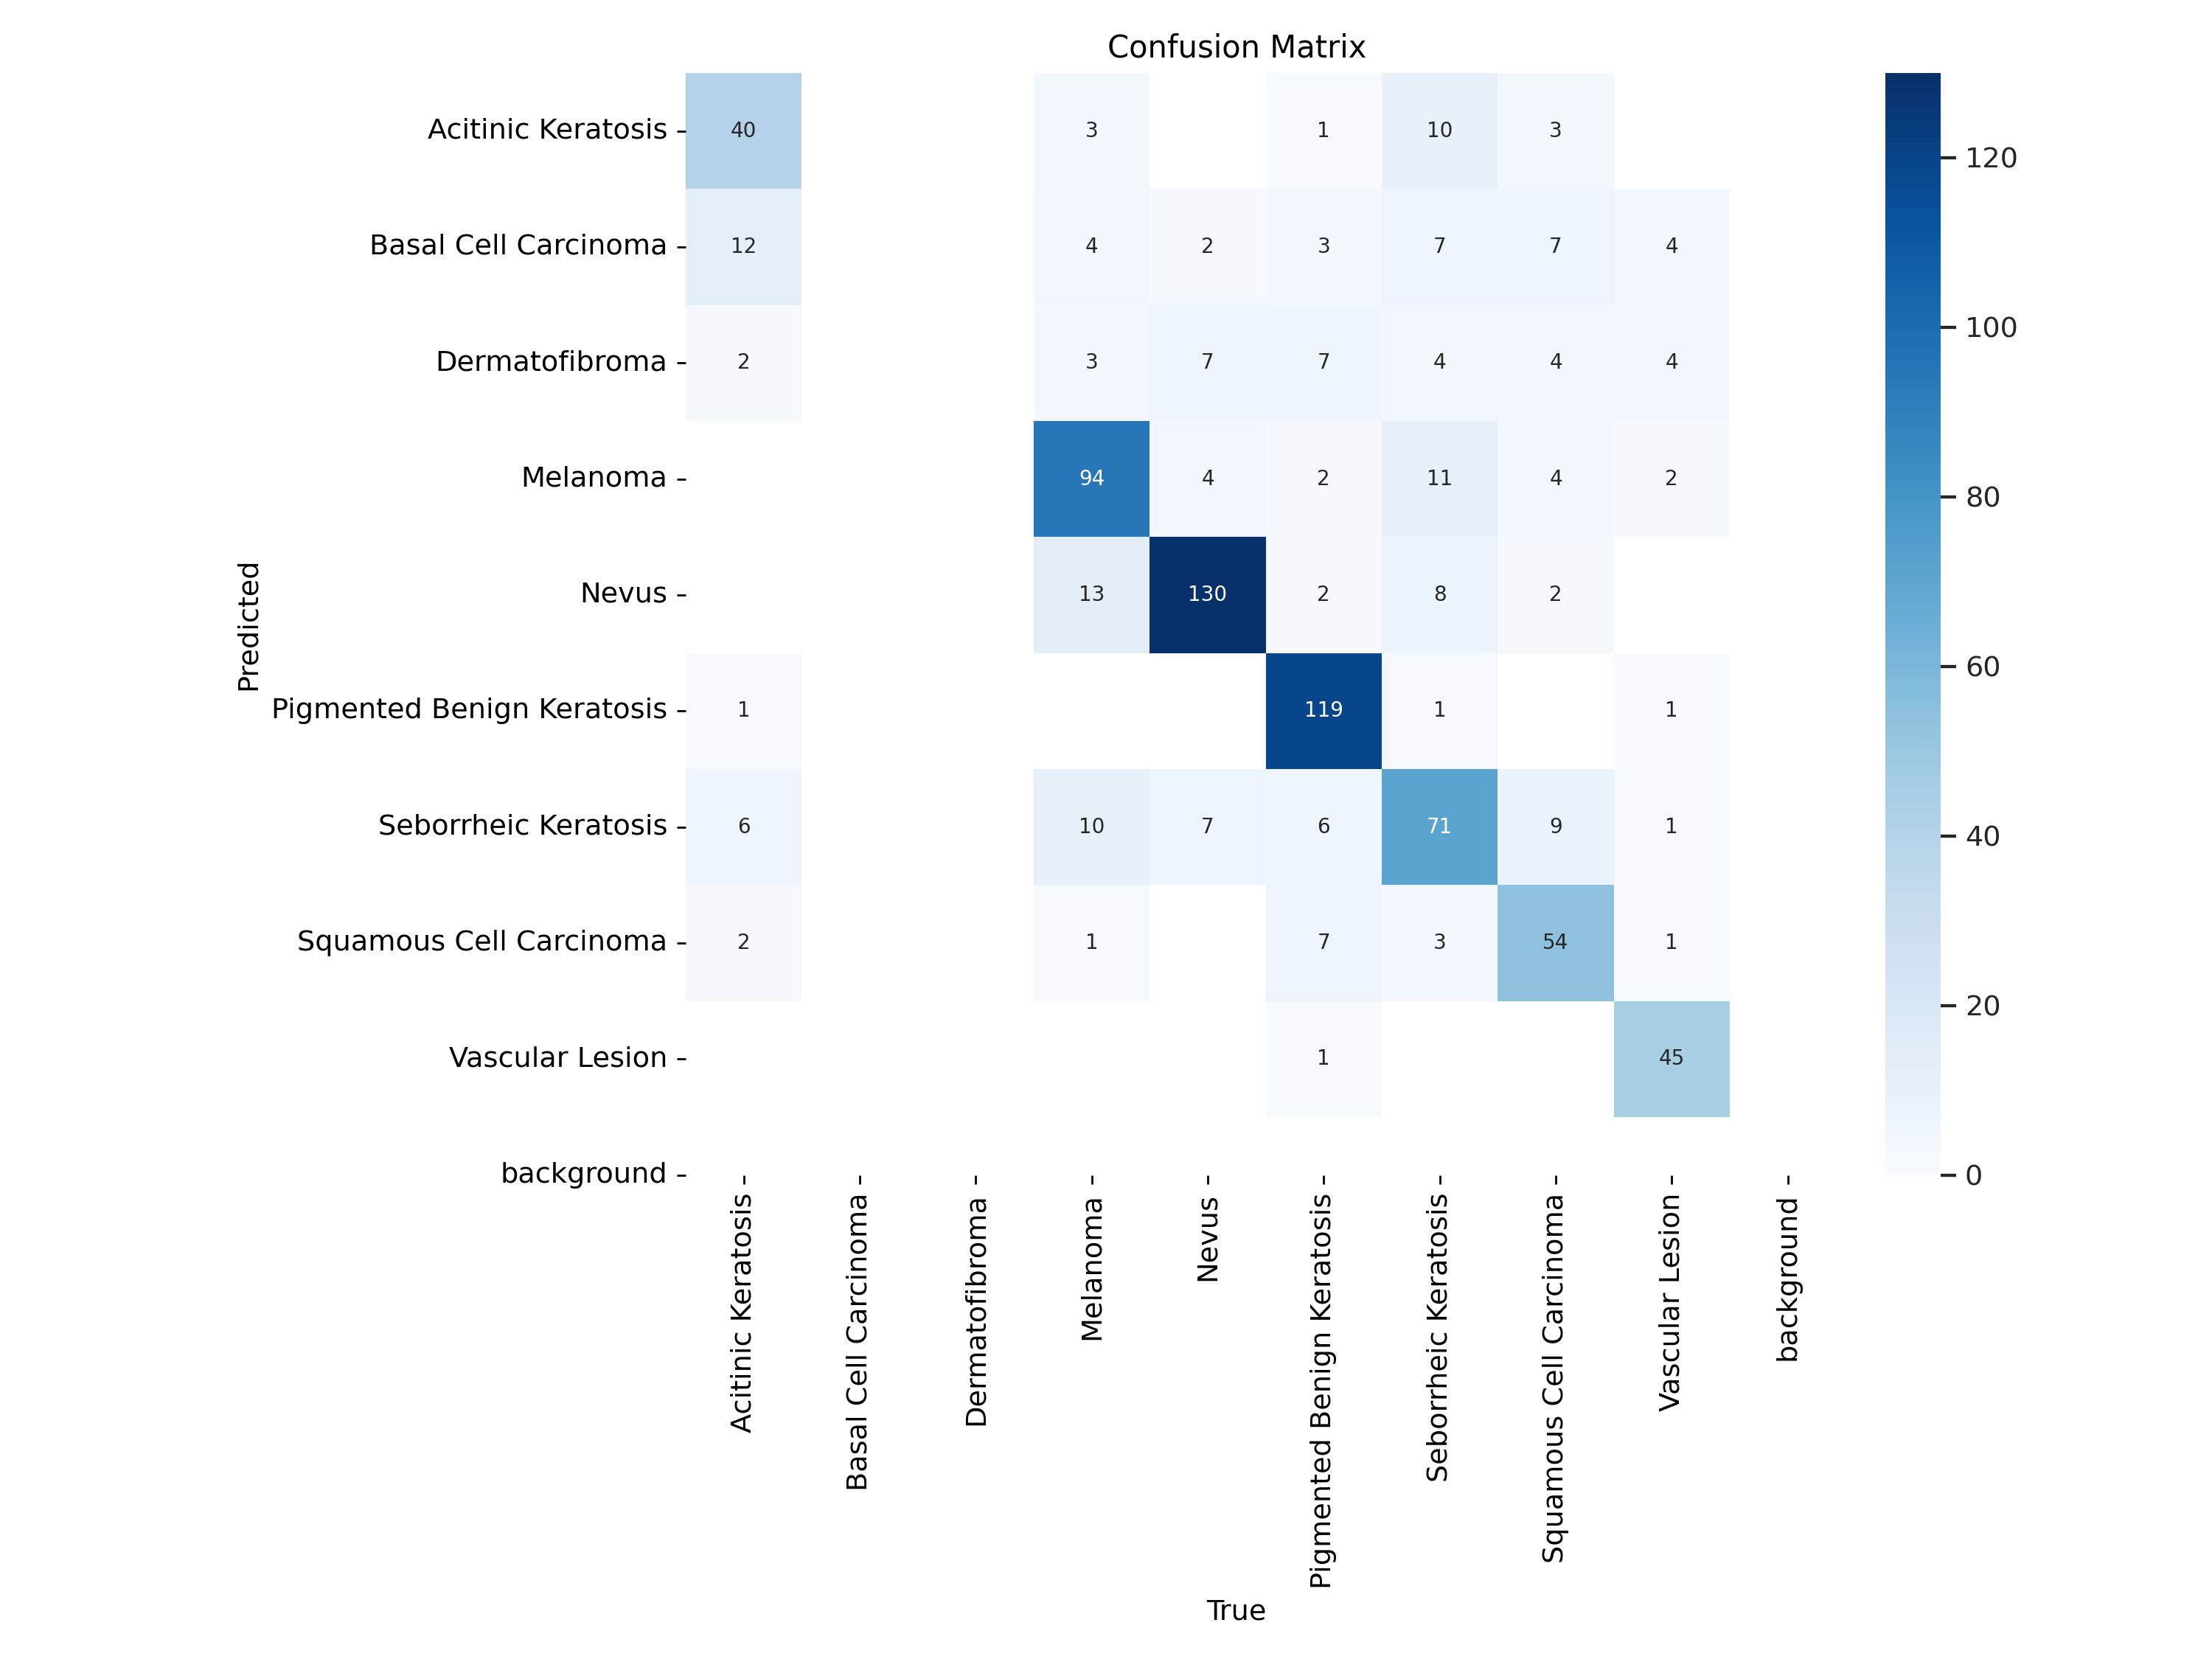

In [33]:
Image("/kaggle/working/runs/classify/train8/confusion_matrix.png", width=1500)

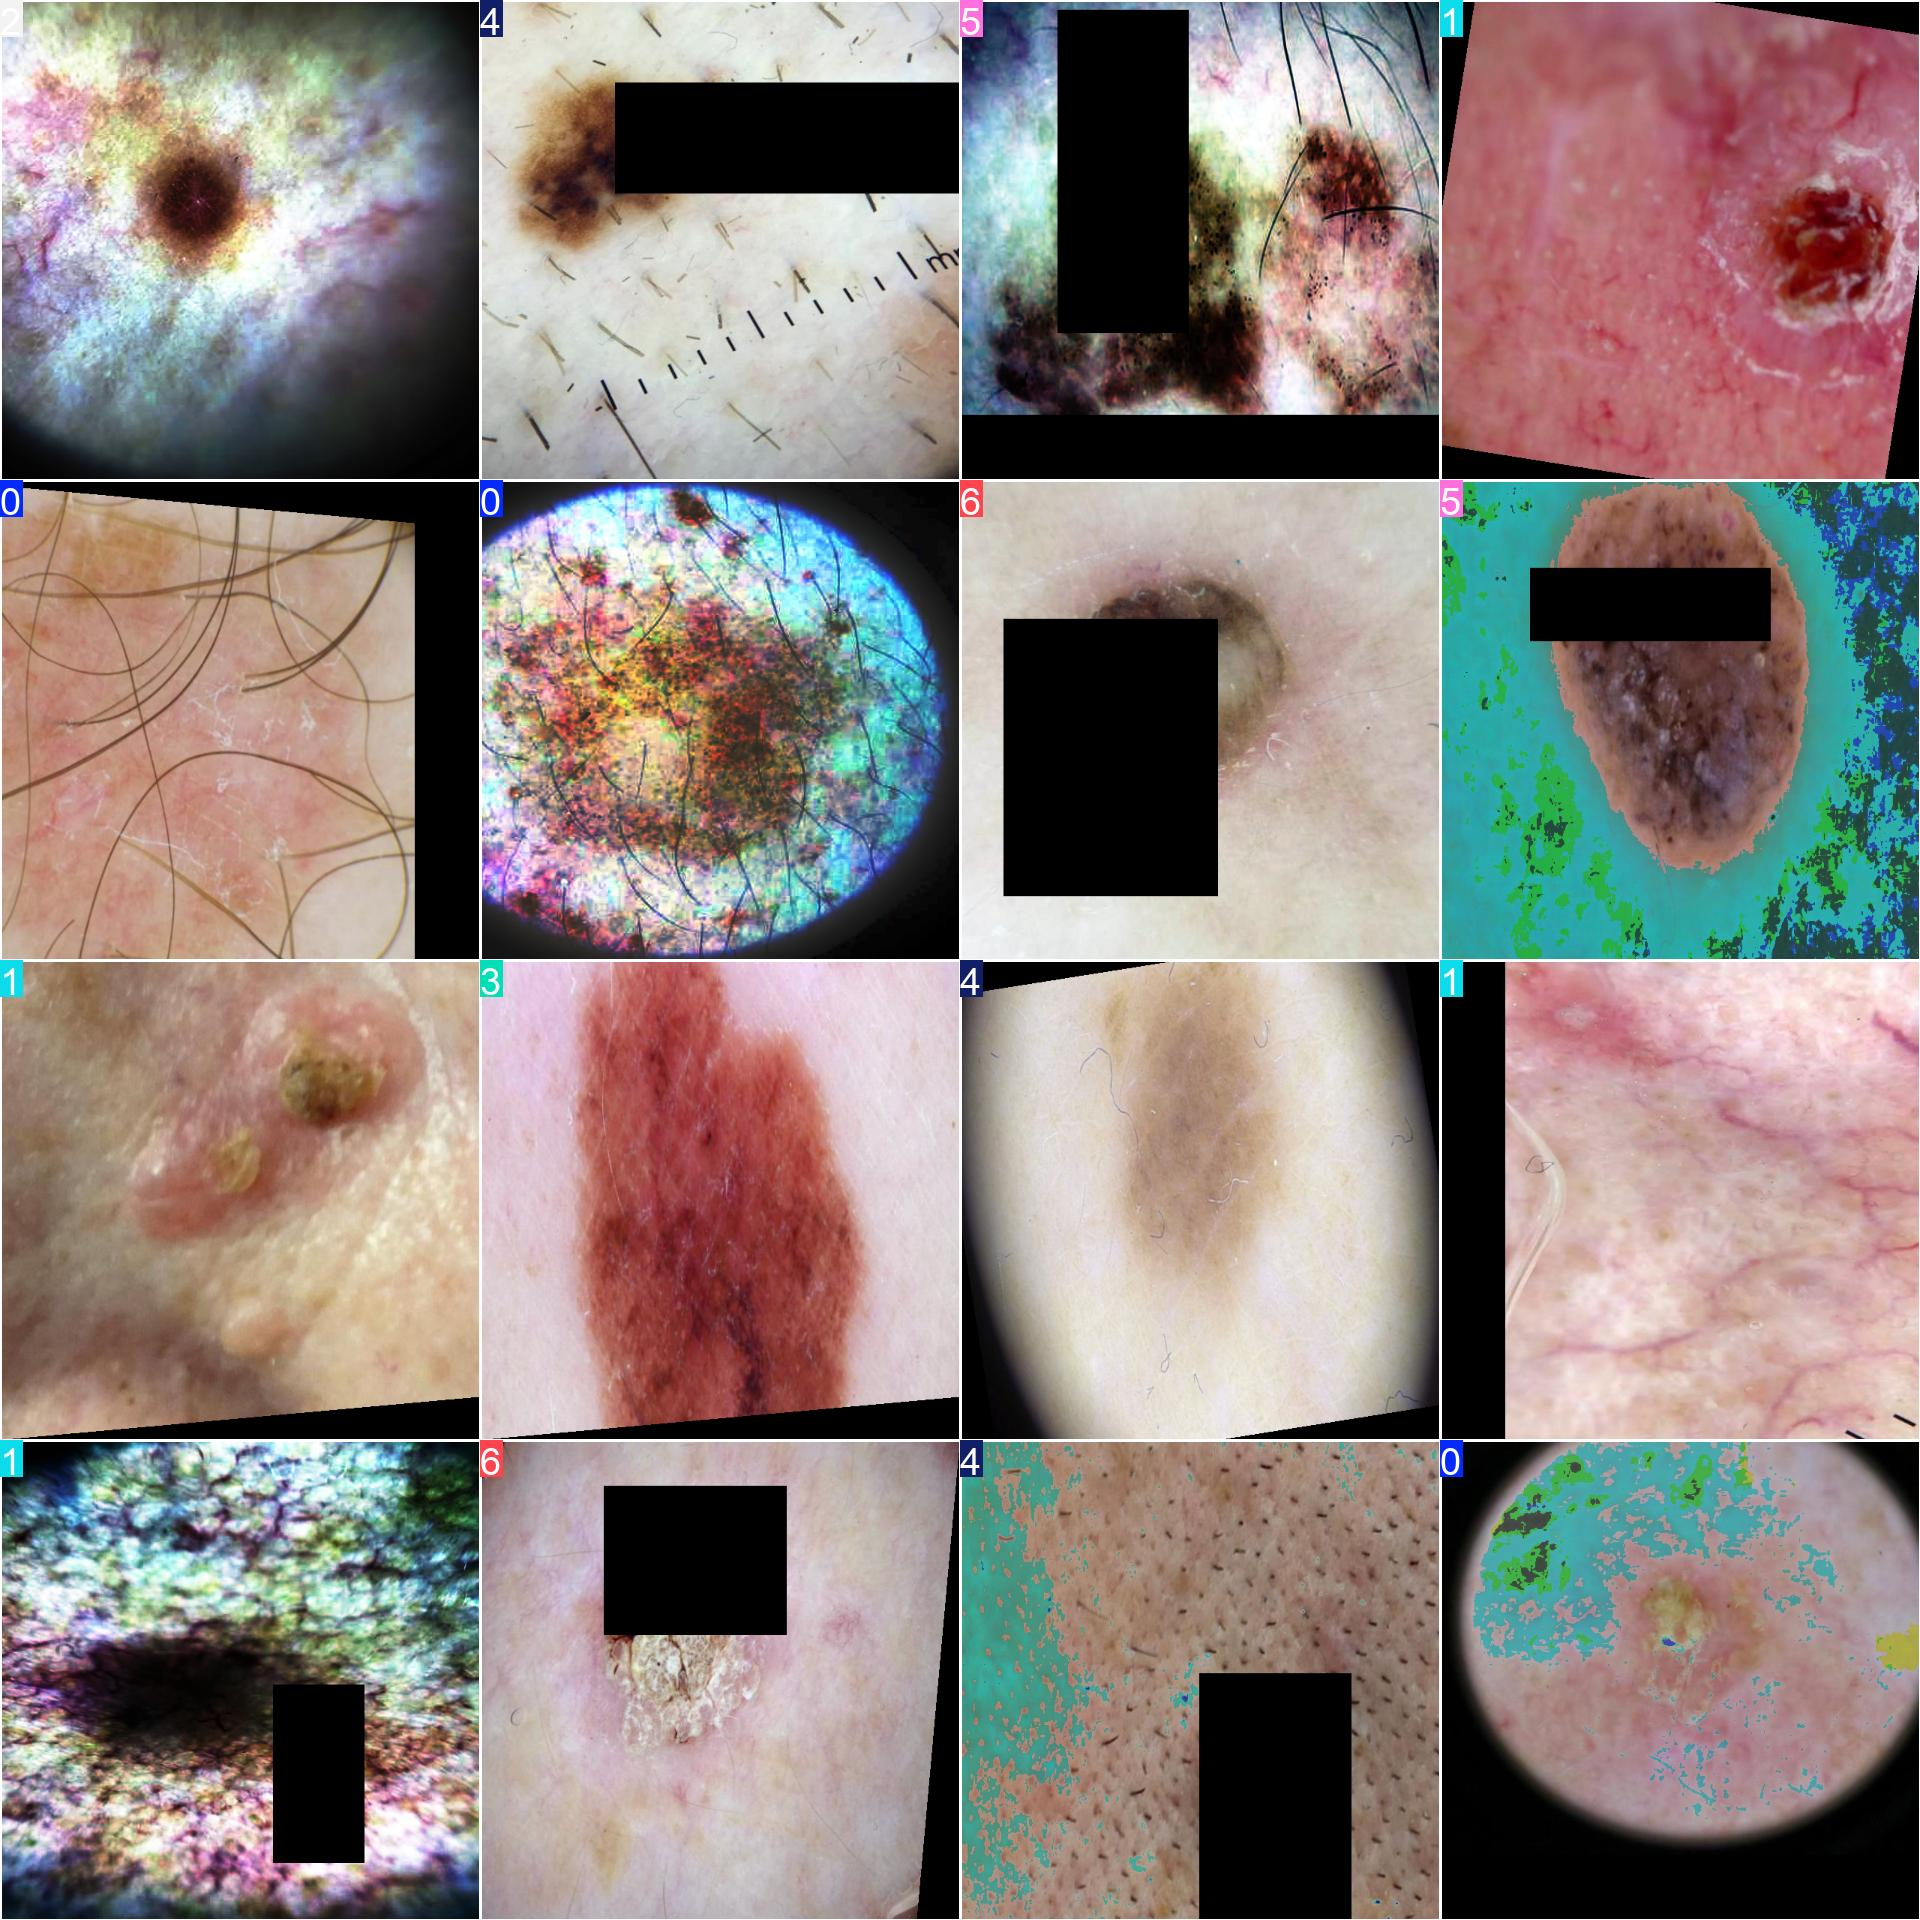

In [35]:
Image("/kaggle/working/runs/classify/train8/train_batch0.jpg", width=1500)

In [44]:
import shutil
import os

def zip_folder(folder_path, output_zip=None):
    """
    Zips the given folder and saves it in the same location or a custom output location.

    Args:
        folder_path (str): Path to the folder to be zipped.
        output_zip (str, optional): Custom output path for the zip file (without extension). 
                                    If None, the zip will be created in the same folder.
    
    Returns:
        str: Path to the created zip file.
    """
    folder_path = os.path.abspath(folder_path)  # Ensure absolute path
    if not os.path.isdir(folder_path):
        raise ValueError(f"Error: '{folder_path}' is not a valid directory.")

    # Default zip file name (same folder name)
    if output_zip is None:
        output_zip = folder_path  # Save in the same location

    # Create the zip file
    zip_path = shutil.make_archive(output_zip, 'zip', folder_path)
    print(f"✅ Folder '{folder_path}' has been zipped as '{zip_path}'")
    
    return zip_path

# Example usage
folder_to_zip = "/kaggle/working/runs/classify/train8"  # Change this to your folder path
zip_folder(folder_to_zip)


✅ Folder '/kaggle/working/runs/classify/train8' has been zipped as '/kaggle/working/runs/classify/train8.zip'


'/kaggle/working/runs/classify/train8.zip'

In [11]:
import os

def rename_directory(old_name, new_name):
    """
    Renames a directory from old_name to new_name.

    Args:
        old_name (str): Current path of the directory.
        new_name (str): New name for the directory.
    
    Returns:
        str: Path to the renamed directory.
    """
    old_name = os.path.abspath(old_name)  # Convert to absolute path
    new_name = os.path.abspath(new_name)  # Convert to absolute path

    if not os.path.exists(old_name):
        raise FileNotFoundError(f"Error: '{old_name}' does not exist.")
    
    if os.path.exists(new_name):
        raise FileExistsError(f"Error: A directory with name '{new_name}' already exists.")
    
    os.rename(old_name, new_name)
    print(f"✅ Directory renamed from '{old_name}' to '{new_name}'")
    
    return new_name

# Example usage
old_folder = "/kaggle/working/skin-diseases-2/valid"
new_folder = "/kaggle/working/skin-diseases-2/val"
rename_directory(old_folder, new_folder)


✅ Directory renamed from '/kaggle/working/skin-diseases-2/valid' to '/kaggle/working/skin-diseases-2/val'


'/kaggle/working/skin-diseases-2/val'

In [22]:
import os

def add_empty_directory(parent_folder, new_dir_name):
    """
    Creates an empty directory inside the given parent folder.

    Args:
        parent_folder (str): Path to the parent folder.
        new_dir_name (str): Name of the new empty directory.
    
    Returns:
        str: Path to the newly created directory.
    """
    parent_folder = os.path.abspath(parent_folder)  # Ensure absolute path
    new_dir_path = os.path.join(parent_folder, new_dir_name)

    if not os.path.exists(parent_folder):
        raise FileNotFoundError(f"Error: Parent folder '{parent_folder}' does not exist.")
    
    if os.path.exists(new_dir_path):
        raise FileExistsError(f"Error: Directory '{new_dir_path}' already exists.")
    
    os.makedirs(new_dir_path)
    print(f"✅ Empty directory '{new_dir_path}' created successfully.")
    
    return new_dir_path

# Example usage
parent_folder = "/kaggle/working/skin-diseases-2/val"  # Change to your parent folder path
new_directory_name = "Dermatofibroma"
add_empty_directory(parent_folder, new_directory_name)

✅ Empty directory '/kaggle/working/skin-diseases-2/val/Dermatofibroma' created successfully.


'/kaggle/working/skin-diseases-2/val/Dermatofibroma'

In [20]:
import os

def delete_file(file_path):
    """
    Deletes a file at the given path.

    Args:
        file_path (str): Path to the file to be deleted.
    
    Returns:
        str: Confirmation message if deleted successfully.
    """
    file_path = os.path.abspath(file_path)  # Ensure absolute path

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Error: File '{file_path}' does not exist.")
    
    if not os.path.isfile(file_path):
        raise ValueError(f"Error: '{file_path}' is not a file.")

    os.remove(file_path)
    print(f"✅ File '{file_path}' deleted successfully.")
    
    return f"File '{file_path}' deleted successfully."

# Example usage
file_to_delete = "/kaggle/working/skin-diseases-2/train.cache"  # Change this to your file path
delete_file(file_to_delete)


✅ File '/kaggle/working/skin-diseases-2/train.cache' deleted successfully.


"File '/kaggle/working/skin-diseases-2/train.cache' deleted successfully."